# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |  Pablo Josué Panécatl García |
| **Fecha**      |  26/08/25 |
| **Expediente** |  751773 |

## Regresión polinomial

Observa la siguiente gráfica.

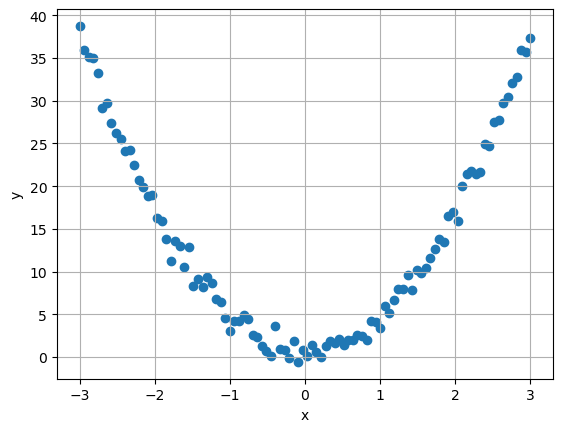

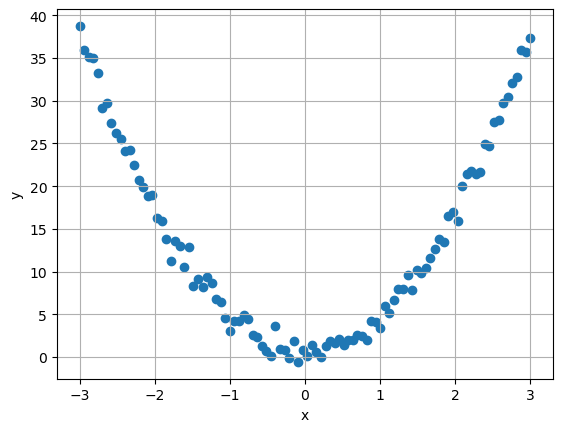

In [2]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.show()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
x = x.reshape(-1, 1)
regresion = LinearRegression().fit(x, y)
beta_0 = regresion.intercept_
beta_1 = regresion.coef_[0]
beta_0, beta_1

(13.30223225795873, -0.049554477435906644)

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

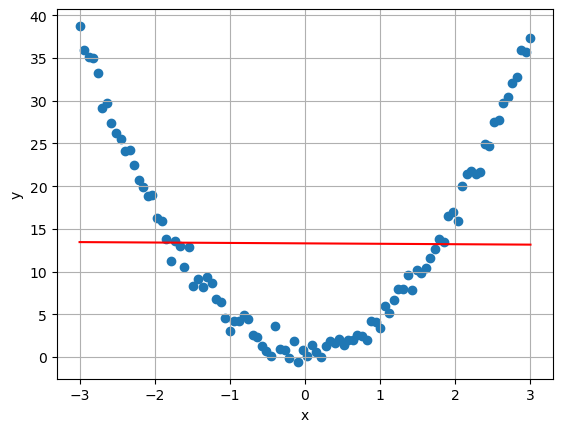

In [7]:
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, regresion.predict(x), color='red')
plt.show()

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [12]:
X2 = np.column_stack((x, x**2))
regresion_cuadratica = LinearRegression().fit(X2, y)
beta_0_cuadratica = regresion_cuadratica.intercept_
beta_1_cuadratica = regresion_cuadratica.coef_[0]
beta_2_cuadratica = regresion_cuadratica.coef_[1]
beta_0_cuadratica, beta_1_cuadratica, beta_2_cuadratica

(0.619420963180481, -0.0495544774359064, 4.143888838887943)

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

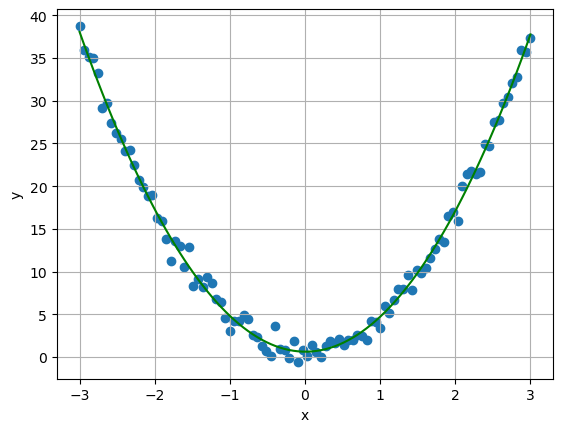

In [13]:
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, regresion_cuadratica.predict(X), color='green')
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

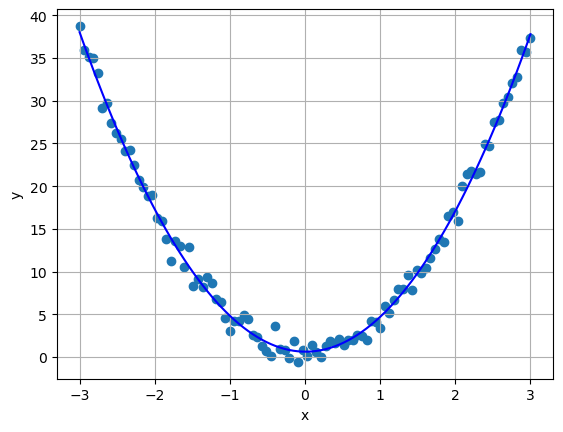

In [14]:
#Regresión de orden 3
X3 = np.column_stack((x, x**2, x**3))
regresion_cubica = LinearRegression().fit(X3, y)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, regresion_cubica.predict(X3), color='blue')
plt.show()

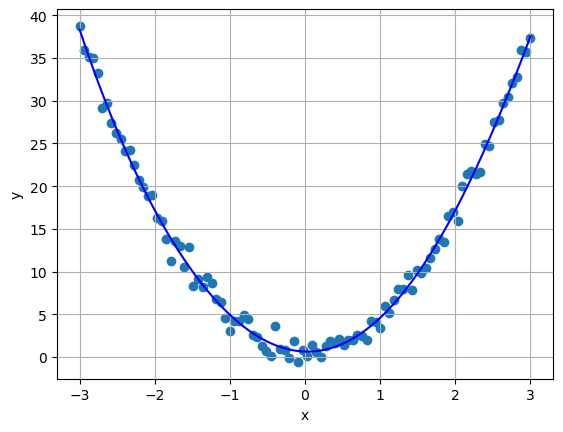

In [15]:
#Regresión de orden 5
X5 = np.column_stack((x, x**2, x**3, x**4, x**5))
regresion_quintica = LinearRegression().fit(X5, y)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, regresion_quintica.predict(X5), color='blue')
plt.show()

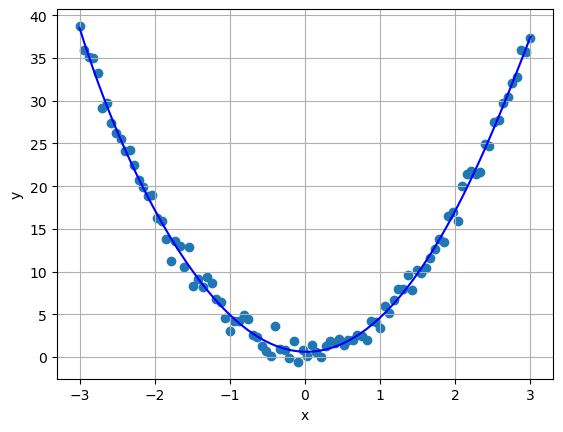

In [16]:
#Regresión de orden 7
X7 = np.column_stack((x, x**2, x**3, x**4, x**5, x**6, x**7))
regresion_septima = LinearRegression().fit(X7, y)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, regresion_septima.predict(X7), color='blue')
plt.show()

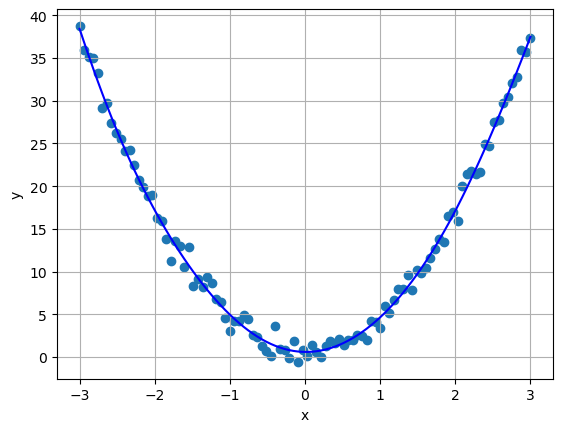

In [17]:
#Regresión de orden 9
X9 = np.column_stack((x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9))
regresion_novena = LinearRegression().fit(X9, y)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, regresion_novena.predict(X9), color='blue')
plt.show()

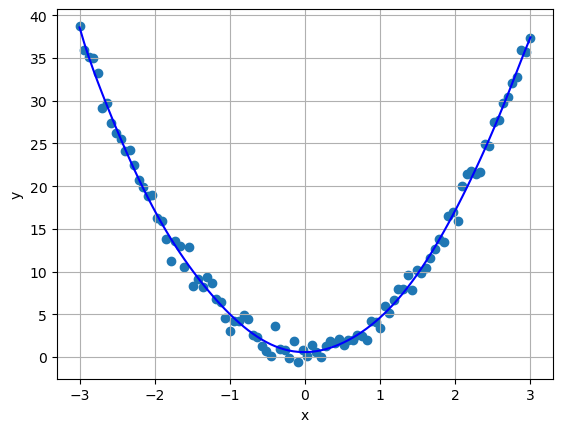

In [18]:
#Regresión de orden 11
X11 = np.column_stack((x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11))
regresion_undecima = LinearRegression().fit(X11, y)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, regresion_undecima.predict(X11), color='blue')
plt.show()

Crea una gráfica por cada modelo con las observaciones y su curva.

In [27]:
from sklearn.metrics import r2_score
r2_2 = r2_score(y, regresion_cuadratica.predict(X2))
r2_3 = r2_score(y, regresion_cubica.predict(X3))
r2_5 = r2_score(y, regresion_quintica.predict(X5))
r2_7 = r2_score(y, regresion_septima.predict(X7))
r2_9 = r2_score(y, regresion_novena.predict(X9))
r2_11 = r2_score(y, regresion_undecima.predict(X11))
r2_2, r2_3, r2_5, r2_7, r2_9, r2_11

(0.9934118040713642,
 0.9934129585186598,
 0.9934954953676421,
 0.9935089341876935,
 0.9935141799662259,
 0.9935338704150221)

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

Considero mejor la regresión de orden 2 ya que el cambio en R2 mientras más sube el orden más insignificativa es, aparte de que el cálculo es más pesado.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [32]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [37]:
print("Cuando x = 5")
print("Según regresión orden 2:", regresion_cuadratica.predict([[5,5**2]]))
print("Según regresión orden 3:", regresion_cubica.predict([[5,5**2,5**3]]))
print("Según regresión orden 5:", regresion_quintica.predict([[5,5**2,5**3,5**4,5**5]]))
print("Según regresión orden 7:", regresion_septima.predict([[5,5**2,5**3,5**4,5**5,5**6,5**7]]))
print("Según regresión orden 9:", regresion_novena.predict([[5,5**2,5**3,5**4,5**5,5**6,5**7,5**8,5**9]]))
print("Según regresión orden 11:", regresion_undecima.predict([[5,5**2,5**3,5**4,5**5,5**6,5**7,5**8,5**9,5**10,5**11]]))

Cuando x = 5
Según regresión orden 2: [103.96886955]
Según regresión orden 3: [104.25232439]
Según regresión orden 5: [84.59895013]
Según regresión orden 7: [33.74321848]
Según regresión orden 9: [215.73637926]
Según regresión orden 11: [-5265.34425354]


¿Cuál modelo crees que sea mejor?

Ahora se nota mucho mejor que la regresión de orden 2 fue la mejor, parece que mientras mayor el grado está más overfitted

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3